In [2]:
import os
import json
import math

import matplotlib.pyplot as plt
import numpy as np

from collections import Counter

In [3]:
path = 'save_results_completion_permutations_2_scrambled_prefs.json'

In [4]:
res = json.load(open(path, 'r'))

In [5]:
len(res['permutations'])

999

In [9]:
list_outputs = []
permutations = []
justifications = []
for (i1, lo), (i2, p) in zip(res['list_outputs'], res['permutations']):
    if len(lo) == 2:
        list_outputs.append((i1, lo))
        permutations.append((i2, p))
len(list_outputs)

999

In [10]:
def apply_permutation(l, perm):
    return [l[i] for i in perm]

In [11]:
res['list_outputs'] = list_outputs
res['permutations'] = permutations

In [12]:
len(res['permutations'])

999

In [13]:
res['list_outputs']

[(0, [0, 1]),
 (1, [0, 1]),
 (2, [0, 1]),
 (3, [0, 1]),
 (4, [1, 0]),
 (5, [1, 0]),
 (6, [0, 1]),
 (7, [0, 1]),
 (8, [0, 1]),
 (9, [0, 1]),
 (10, [0, 1]),
 (11, [0, 1]),
 (12, [0, 1]),
 (13, [0, 1]),
 (14, [0, 1]),
 (15, [1, 0]),
 (16, [0, 1]),
 (17, [0, 1]),
 (18, [0, 1]),
 (19, [0, 1]),
 (20, [0, 1]),
 (21, [1, 0]),
 (22, [0, 1]),
 (23, [0, 1]),
 (24, [0, 1]),
 (25, [1, 0]),
 (26, [1, 0]),
 (27, [0, 1]),
 (28, [0, 1]),
 (29, [0, 1]),
 (30, [0, 1]),
 (31, [1, 0]),
 (32, [1, 0]),
 (33, [1, 0]),
 (34, [0, 1]),
 (35, [0, 1]),
 (36, [0, 1]),
 (37, [0, 1]),
 (38, [0, 1]),
 (39, [0, 1]),
 (40, [0, 1]),
 (41, [0, 1]),
 (42, [0, 1]),
 (43, [0, 1]),
 (44, [0, 1]),
 (45, [1, 0]),
 (46, [0, 1]),
 (47, [0, 1]),
 (48, [0, 1]),
 (49, [0, 1]),
 (50, [0, 1]),
 (51, [0, 1]),
 (52, [0, 1]),
 (53, [1, 0]),
 (54, [1, 0]),
 (55, [0, 1]),
 (56, [1, 0]),
 (57, [0, 1]),
 (58, [0, 1]),
 (59, [0, 1]),
 (60, [1, 0]),
 (61, [0, 1]),
 (62, [0, 1]),
 (63, [1, 0]),
 (64, [0, 1]),
 (65, [0, 1]),
 (66, [1, 0]),
 (67,

In [14]:
res['puz_ids']

[[7, 5],
 [4, 0],
 [2, 5],
 [5, 6],
 [0, 3],
 [0, 7],
 [4, 6],
 [3, 6],
 [3, 6],
 [3, 6],
 [0, 1],
 [7, 5],
 [3, 0],
 [7, 2],
 [1, 3],
 [6, 0],
 [7, 0],
 [6, 3],
 [6, 3],
 [7, 2],
 [0, 4],
 [0, 6],
 [6, 7],
 [3, 0],
 [3, 4],
 [5, 1],
 [4, 3],
 [3, 5],
 [5, 4],
 [0, 1],
 [6, 2],
 [4, 6],
 [5, 0],
 [0, 6],
 [2, 1],
 [7, 3],
 [5, 4],
 [0, 4],
 [6, 3],
 [4, 7],
 [6, 7],
 [2, 1],
 [6, 1],
 [4, 1],
 [2, 3],
 [4, 1],
 [7, 2],
 [5, 1],
 [4, 6],
 [6, 7],
 [5, 4],
 [2, 3],
 [3, 1],
 [2, 3],
 [4, 1],
 [5, 3],
 [4, 7],
 [2, 0],
 [1, 2],
 [5, 0],
 [5, 0],
 [4, 7],
 [7, 4],
 [1, 6],
 [4, 2],
 [2, 4],
 [2, 3],
 [0, 4],
 [3, 7],
 [0, 6],
 [5, 7],
 [5, 2],
 [2, 1],
 [0, 5],
 [3, 4],
 [5, 7],
 [0, 1],
 [5, 6],
 [1, 6],
 [1, 4],
 [2, 1],
 [5, 6],
 [7, 3],
 [6, 7],
 [4, 2],
 [5, 6],
 [6, 7],
 [2, 0],
 [3, 0],
 [6, 0],
 [5, 4],
 [6, 3],
 [5, 3],
 [3, 5],
 [0, 7],
 [4, 6],
 [3, 5],
 [1, 7],
 [2, 7],
 [2, 7],
 [0, 2],
 [3, 7],
 [3, 1],
 [3, 1],
 [6, 5],
 [4, 3],
 [5, 1],
 [5, 4],
 [2, 3],
 [2, 4],
 [6, 0],
 

In [15]:
# for the pref version
puzzle_mapping = {
    0: 1,
    1: 1,
    2: 0,
    3: 0,
    4: 2,
    5: 2, 
    6: 3,
    7: 3
}

In [16]:
ptype_names = {
    0: 'Bad',
    1: 'Hard',
    2: 'Trivial',
    3: 'Appropriate',
}

In [17]:
len(res['unique'])

2

In [19]:
print(f'{len(res["unique"]) / math.factorial(2) * 100:.2f}% of permutations are filled.')

100.00% of permutations are filled.


In [20]:
perms = [p for _, p in res['list_outputs']]

In [21]:
i = 4

In [22]:
# test the unscrambling thingy
perm0 = perms[i]
pid0 = res['puz_ids'][i]

In [23]:
# to get the indices of the puzzles we need to
# apply the preference permutation to the random permutation
# then apply this permutation to the puzzle ids

prefs_permuted = apply_permutation(res['permutations'][i][1], res['list_outputs'][i][1])
actual_prefs = apply_permutation(res['puz_ids'][i], prefs_permuted)
actual_prefs

[0, 3]

In [24]:
print(res['justifications'][i][1])

The first puzzle, exUV, is a simple anagram problem. It is clear what needs to be done (determine if two words are anagrams) and it provides an opportunity for learning about string manipulation and sorting. The difficulty is appropriate for a second-year undergraduate course. However, it may not be very engaging as it is a straightforward problem without much complexity.

The second puzzle, lSSs, is more complex and involves finding a set of numbers that satisfy certain conditions. It requires understanding of mathematical concepts such as prime numbers and greatest common divisor (gcd). It provides an opportunity for learning about number theory and algorithmic problem-solving. The difficulty is also appropriate for a second-year undergraduate course. This puzzle is more engaging as it involves a more challenging problem and requires thinking about different strategies to find the solution.

Based on these criteria, the second puzzle (lSSs) is the most appropriate for the course.

An

In [25]:
res['puz_ids'][i]

[0, 3]

In [26]:
puz_ids_in_order = [res['puz_ids'][i][j] for j in perms[i]]
puz_ids_in_order

[3, 0]

In [27]:
res['list_outputs'][1]

(1, [0, 1])

In [28]:
# [1, 6, 3, 2, 0]?
print(res['justifications'][i][1])

The first puzzle, exUV, is a simple anagram problem. It is clear what needs to be done (determine if two words are anagrams) and it provides an opportunity for learning about string manipulation and sorting. The difficulty is appropriate for a second-year undergraduate course. However, it may not be very engaging as it is a straightforward problem without much complexity.

The second puzzle, lSSs, is more complex and involves finding a set of numbers that satisfy certain conditions. It requires understanding of mathematical concepts such as prime numbers and greatest common divisor (gcd). It provides an opportunity for learning about number theory and algorithmic problem-solving. The difficulty is also appropriate for a second-year undergraduate course. This puzzle is more engaging as it involves a more challenging problem and requires thinking about different strategies to find the solution.

Based on these criteria, the second puzzle (lSSs) is the most appropriate for the course.

An

In [29]:
def plot_permutations_pref(results, perms, puz_ids, n_positions=2, indices=4, title=None):
    if title is None:
        title = 'Proportion of each index at each position in permutations'
    # Initialize a 2D list to hold frequency counts for each index at each position
    # 5 positions, with 5 possible indices at each position
    freq_counts = np.zeros((n_positions, indices))
    puz_types = []
    for perm, pid, result in zip(perms, puz_ids, results):

        prefs_permuted = apply_permutation(perm, result)
        actual_prefs = apply_permutation(pid, prefs_permuted)
        puzzle_type = [puzzle_mapping[p] for p in actual_prefs]
        puz_types.append(puzzle_type)

    # Iterate over each permutation
    for perm in puz_types:
        for pos, index in enumerate(perm):
            # Increment the count for the index at the current position
            freq_counts[pos, index] += 1

    # Normalize the counts to get proportions
    freq_counts /= len(perms)
    std_devs = np.std(freq_counts, axis=1)

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))
    positions = np.arange(n_positions)  # Positions in the permutation
    bar_width = 0.15  # Width of the bars

    # Plot a bar for each index at each position
    for i in range(indices):
        ax.bar(positions + i * bar_width, freq_counts[:, i], width=bar_width, label=ptype_names[i],
           yerr=std_devs, capsize=5)

    # Formatting the plot
    ax.set_xlabel('Position in permutation')
    ax.set_ylabel('Proportion')
    ax.set_title(title)
    ax.set_xticks(positions + bar_width * 2)
    ax.set_xticklabels([f'Position {i}' for i in range(n_positions)])
    ax.legend()

    plt.tight_layout()
    plt.show()

In [30]:
for i, (r0, r1) in enumerate(zip(res['list_outputs'], res['permutations'])):
    if not r0[0] == r1[0]:
        print(i)

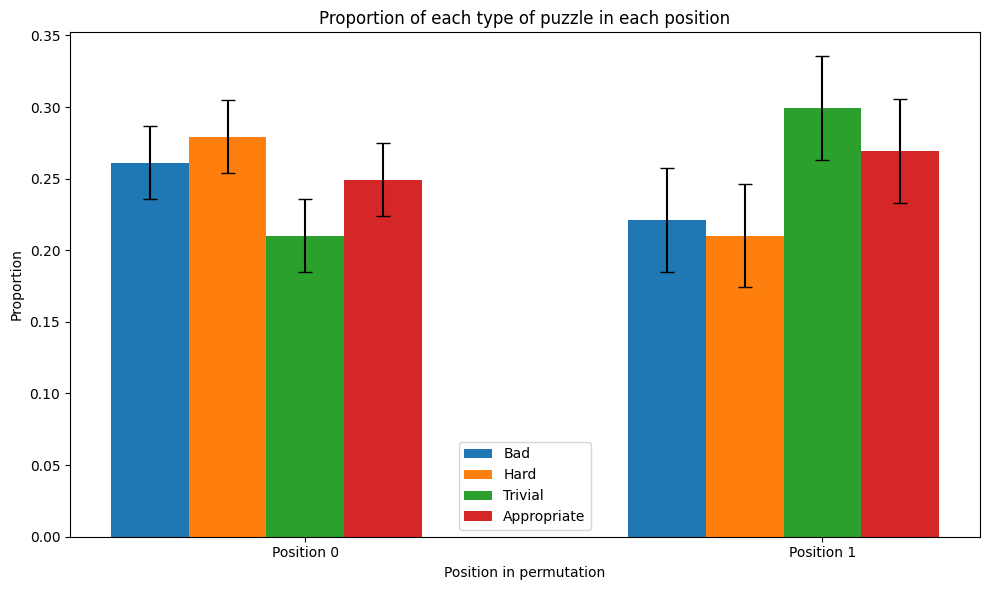

In [31]:
plot_permutations_pref(
    [r[1] for r in res['list_outputs']],
    [r[1] for r in res['permutations']],
    res['puz_ids'],
    title='Proportion of each type of puzzle in each position',
)

In [34]:
# are there any biases in absolute order?
# Thank mr chatgpt
def plot_permutations(perms, n=2, title=None):
    if title is None:
        title = 'Proportion of each index at each position in permutations'
    # Initialize a 2D list to hold frequency counts for each index at each position
    # 5 positions, with 5 possible indices at each position
    freq_counts = np.zeros((n, n))

    # Iterate over each permutation
    for perm in perms:
        for pos, index in enumerate(perm):
            # Increment the count for the index at the current position
            freq_counts[pos, index] += 1

    # Normalize the counts to get proportions
    freq_counts /= len(perms)
    std_devs = np.std(freq_counts, axis=1)

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))
    positions = np.arange(n)  # Positions in the permutation
    bar_width = 0.15  # Width of the bars

    # Plot a bar for each index at each position
    for i in range(n):
        ax.bar(positions + i * bar_width, freq_counts[:, i], width=bar_width, label=f'Index {i}',
           yerr=std_devs, capsize=5)

    # Formatting the plot
    ax.set_xlabel('Position in permutation')
    ax.set_ylabel('Proportion')
    ax.set_title(title)
    ax.set_xticks(positions + bar_width * 2)
    ax.set_xticklabels([f'Position {i}' for i in range(n)])
    ax.legend()

    plt.tight_layout()
    plt.show()

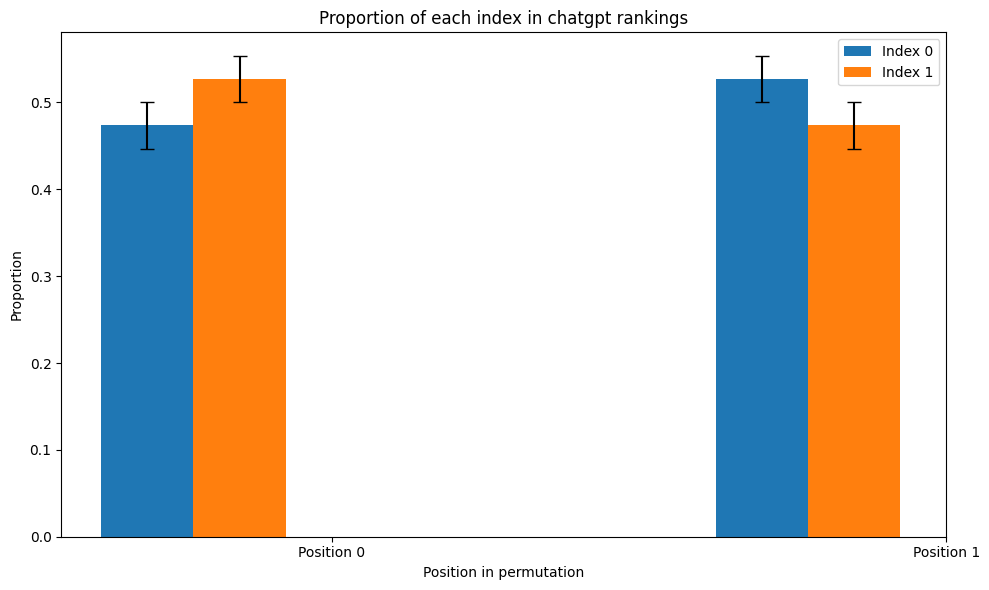

In [35]:
plot_permutations(
    [r[1] for r in res['permutations']],
    title='Proportion of each index in chatgpt rankings'
)

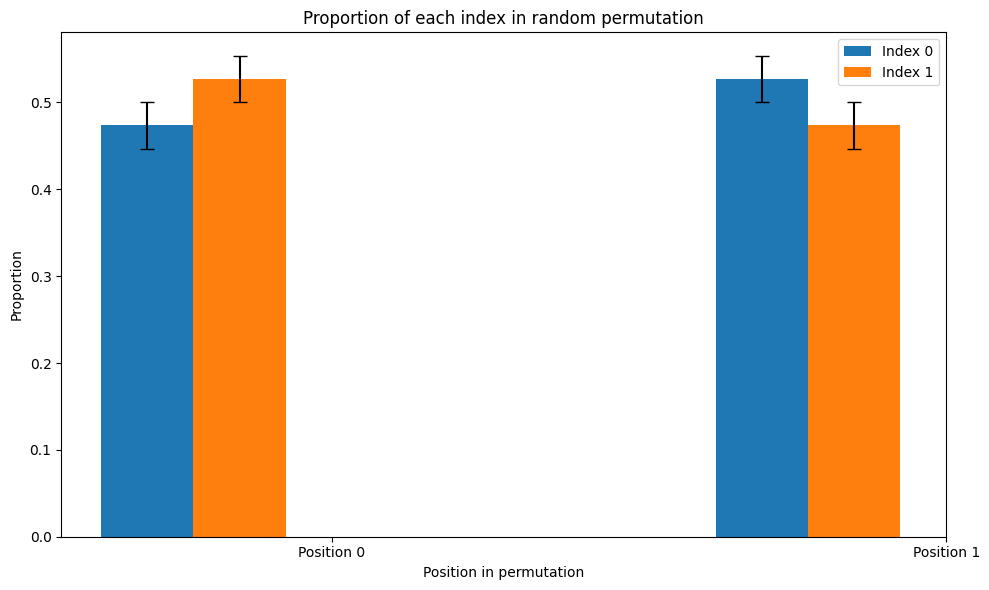

In [36]:
# ground truth permutation stats
perms_gt = [p for _, p in res['permutations']]
plot_permutations(perms_gt, title='Proportion of each index in random permutation')

In [37]:
len(perms)

999

In [38]:
l = [2, 3, 0, 4, 1]
perm = [0, 1, 2, 3, 4]
apply_permutation(l, perm)

[2, 3, 0, 4, 1]

In [39]:
apply_permutation(l, [4, 3, 2, 1, 0])

[1, 4, 0, 3, 2]

In [40]:
print(len(res['permutations']))
print(len(res['list_outputs']))

999
999


In [41]:
actual_rankings = [apply_permutation(l, perm) for (_, l), (_, perm) in zip(res['list_outputs'], res['permutations'])]

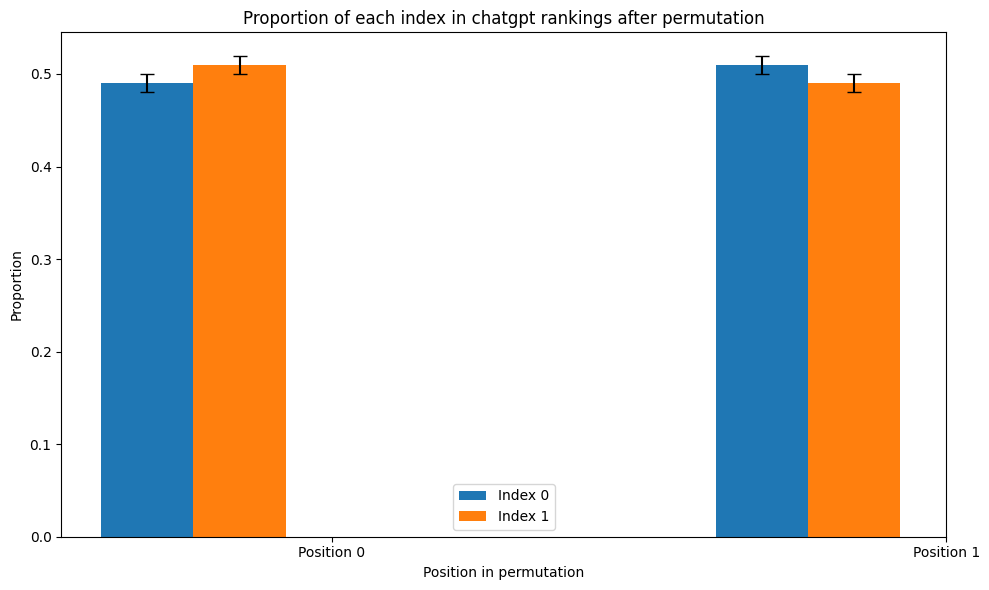

In [42]:
plot_permutations(actual_rankings, title='Proportion of each index in chatgpt rankings after permutation')

In [51]:
# get matches between puzzles
# first get the absolute rankings
actual_prefs = []
for perm, pid, result in zip(
        [r[1] for r in res['permutations']],
        res['puz_ids'],
        res['list_outputs']):
    prefs_permuted = apply_permutation(perm, result)
    actual_prefs = apply_permutation(pid, prefs_permuted)

TypeError: tuple indices must be integers or slices, not list